In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%precision 3

'%.3f'

### 표본평균을 여러 번 계산하기

In [3]:
population = stats.norm(loc=4, scale=0.8)
sample_mean_array = np.zeros(10000)

In [4]:
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    sample_mean_array[i] = np.mean(sample)

In [5]:
sample_mean_array

array([3.922, 3.864, 4.07 , ..., 4.136, 4.575, 4.099])

In [6]:
# 표본평균의 평균값은 모평균에 가깝다
np.mean(sample_mean_array)

4.004202422791747

In [7]:
np.std(sample_mean_array, ddof=1)

0.2513580850860402

C:\Users\HYUNJUN\anaconda3\envs\deep-learning-gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

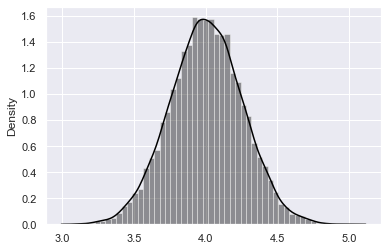

In [8]:
sns.distplot(sample_mean_array, color="black")

In [9]:
# 샘플사이즈가 크면 표본평균은 모평균에 가까워진다
size_array = np.arange(10, 100100, 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [11]:
sample_mean_array_size = np.zeros(len(size_array))
len(sample_mean_array_size)

1001

In [12]:
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = np.mean(sample)

Text(0, 0.5, 'sample mean')

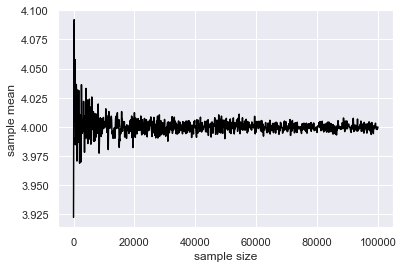

In [14]:
plt.plot(size_array, sample_mean_array_size, color="black")
plt.xlabel("sample size")
plt.ylabel("sample mean")

In [15]:
# 표본평균을 몇 번이고 계산하는 함수 만들기
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size=size)
        sample_mean_array[i] = np.mean(sample)
    return sample_mean_array

In [16]:
np.random.seed(1)
np.mean(calc_sample_mean(size=10, n_trial=10000))

4.004202422791747

In [21]:
# 샘플사이즈를 바꿨을 떄 표본평균의 분산
np.random.seed(1)

size_10 = calc_sample_mean(size=10, n_trial=10000)
size_10_df = pd.DataFrame({
    "sample_mean": size_10,
    "size": np.tile("size 10", 10000)})

size_20 = calc_sample_mean(size=20, n_trial=10000)
size_20_df = pd.DataFrame({
    "sample_mean": size_20,
    "size": np.tile("size 20", 10000)})

size_30 = calc_sample_mean(size=30, n_trial=10000)
size_30_df = pd.DataFrame({
    "sample_mean": size_30,
    "size": np.tile("size 30", 10000)})

In [26]:
sim_result = pd.concat([size_10_df, size_20_df, size_30_df], axis=0)
sim_result.head()

,sample_mean,size
0,3.922287,size 10
1,3.864329,size 10
2,4.069530,size 10
3,3.857140,size 10
4,4.184654,size 10


<AxesSubplot:xlabel='size', ylabel='sample_mean'>

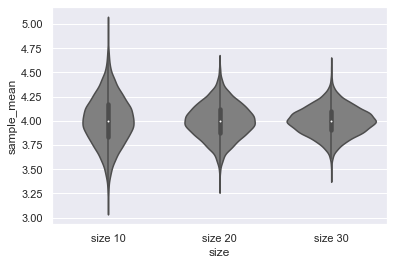

In [27]:
sns.violinplot(x="size", y="sample_mean", data=sim_result, color="gray")

In [28]:
# 표본평균의 표준편차는 모집단보다 작다
size_array = np.arange(2, 102, 2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [29]:
sample_mean_std_array = np.zeros(len(size_array))

In [30]:
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size=size_array[i], n_trial=100)
    sample_mean_std_array[i] = np.std(sample_mean, ddof=1)

Text(0, 0.5, 'mean_std value')

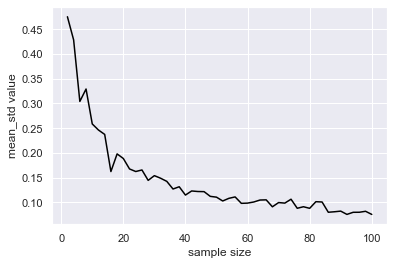

In [31]:
plt.plot(size_array, sample_mean_std_array, color="black")
plt.xlabel("sample size")
plt.ylabel("mean_std value")

In [33]:
# 표준오차 (standard error)
standard_error = 0.8 / np.sqrt(size_array)
standard_error

array([0.566, 0.4  , 0.327, 0.283, 0.253, 0.231, 0.214, 0.2  , 0.189,
       0.179, 0.171, 0.163, 0.157, 0.151, 0.146, 0.141, 0.137, 0.133,
       0.13 , 0.126, 0.123, 0.121, 0.118, 0.115, 0.113, 0.111, 0.109,
       0.107, 0.105, 0.103, 0.102, 0.1  , 0.098, 0.097, 0.096, 0.094,
       0.093, 0.092, 0.091, 0.089, 0.088, 0.087, 0.086, 0.085, 0.084,
       0.083, 0.083, 0.082, 0.081, 0.08 ])

Text(0, 0.5, 'mean_std value')

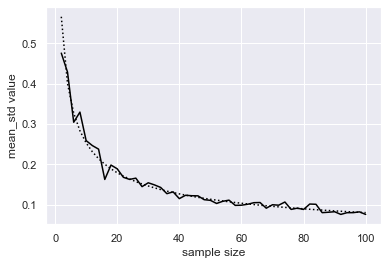

In [34]:
plt.plot(size_array, sample_mean_std_array, color="black")
plt.plot(size_array, standard_error, color="black", linestyle="dotted")
plt.xlabel("sample size")
plt.ylabel("mean_std value")

In [36]:
# 표본분산의 평균값은 모분산과 차이가 있다
sample_var_array = np.zeros(10000)

In [37]:
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    sample_var_array[i] = np.var(sample, ddof=0)

In [38]:
np.mean(sample_var_array)

0.5746886877332101

In [39]:
# 불편분산을 사용하면 편향이 사라진다
unbias_var_array = np.zeros(10000)
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    unbias_var_array[i] = np.var(sample, ddof=1)
np.mean(unbias_var_array)

0.6385429863702334

In [40]:
# 샘플사이즈가 크면 불편분산은 모분산에 가까워진다
size_array = np.arange(10, 100100, 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [41]:
unbias_var_array = np.zeros(len(size_array))
len(unbias_var_array)

1001

In [42]:
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    unbias_var_array[i] = np.var(sample, ddof=1)

Text(0, 0.5, 'unbias var')

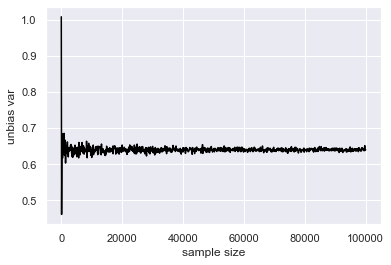

In [43]:
plt.plot(size_array, unbias_var_array, color="black")
plt.xlabel("sample size")
plt.ylabel("unbias var")

### 불편성과 일치성, 모수에 대해 좋은 추정량이란?
1. 불편성
    - 추정량의 기대값이 진짜 모수 (모집단의 파라미터)가 되는 특성을 불편성이라고 합니다.
    - 불편성이 있다는 것은 평균을 냈을 때 과대 또는 과소하지 않다는 뜻이며, 곧 편향이 없는 추정량입니다.
2. 일치성
    - 샘플사이즈가 커지면 추정량이 진짜 모수에 가까워지는 특성을 일치성이라고 합니다.
    - 일치성이 있다는 것은 샘플사이즈가 무한할 때 추정량과 모수가 일치한다는 뜻입니다.
3. 모수에 대해 좋은 추정량
    - 분석의 목적은 모집단분포를 추정하는 데 있습니다. 
    - 모집단분포를 알면 모르는 데이터에 대해 예측이 가능하기 때문입니다.
    - 여기서 모집단분포를 정규분포로 가정하면 정규분포의 모수를 추정하는 것으로 모집단분포 추정이 가능합니다.
    - 정규분포의 모수는 평균과 분산 2개입니다. 보통 표본평균과 불편분산을 정규분포의 모수로 활용합니다.
    - 표본평균과 불편분산이 모수의 추정량으로 선호되는 특성을 갖춘 것을 확인할 수 있었습니다.
    - 표본평균의 평균값은 모평균과 거의 같고, 불편분산의 평균값은 모분산에 수렴하는 것을 확인했습니다.
    - 표본평균과 불편분산은 불편성을 가지고 있다고 말할 수 있습니다.
    - 또한 샘플사이즈를 크게 하면 표본평균은 모평균, 불편분산은 모분산에 가까워집니다.
    - 이에 따라 표본평균과 불편분산은 둘 다 일치성을 가지고 있다고 할 수 있습니다.

### 큰수의 법칙
큰수의 법칙은 간단히 말해, 표본의 크기가 커지면 표본평균이 모평균에 가까워지는 패턴을 표현한 법칙입니다.

### 중심극한정리
- 모집단분포가 무엇이든 간에 샘플사이즈가 커지면 확률변수의 '합'은 정규분포에 가까워집니다
- 이를 중심극한정리라고 합니다.

C:\Users\HYUNJUN\anaconda3\envs\deep-learning-gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

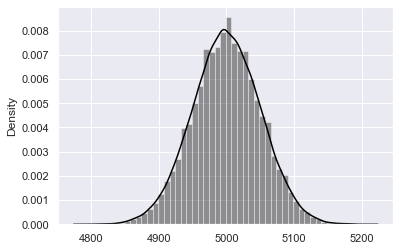

In [45]:
# 샘플사이즈의 시행횟수
n_size = 10000
n_trial = 50000

# 앞면이면 1, 뒷면이면 0으로 표시
coin = np.array([0, 1])

# 앞면이 나온 횟수
count_coin = np.zeros(n_trial)

# 동전을 n_size번 던지는 시행을 n_trial번 수행
np.random.seed(1)
for i in range(0, n_trial):
    count_coin[i] = np.sum(np.random.choice(coin, size=n_size, replace=True))

# 히스토그램 그리기
sns.distplot(count_coin, color="black")